Andrew Dodd
, 2/21/18
# Machine Learning Project Notebook
## Table of Contents
### 1. Imports
### 2. Cleaning
### 3. Exploration/Unsupervised Learning
### 4. Modeling and Prediction
### 5. Write to csv (results, data)

## 1. Imports

In [351]:
import pandas as pd
import numpy as np
import seaborn as sns
import math
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
%matplotlib inline

house_train = pd.read_csv('./data/train.csv')
house_test = pd.read_csv('./data/test.csv')

house_train.rename(index=str, columns={"BedroomAbvGr":"Bedroom", "KitchenAbvGr":"Kitchen"},
                   inplace = True)
house_test.rename(index=str, columns={"BedroomAbvGr":"Bedroom", "KitchenAbvGr":"Kitchen"},
                    inplace = True)

names = list(house_test.columns.values)

## 2. Cleaning
Here we do the cleaning for the data. This will include examining the dataset, value imputation, visualization, filling or removing NAs, etc.

### 2.1 Converting column types to numeric
Now that we have our dataset imported, we need to convert the numeric parts into numeric.

In [352]:
with open("ColumnsExplained.txt") as f:
    content = f.readlines()
    
# you may also want to remove whitespace characters like `\n` at the end of each line
content = [x.strip() for x in content] 

import re

prev_column = '' # Most recent column name
num_lines = 0 # number of lines since column name
i = 0

# Iterating through, if a row in the text file is followed by a space and then another feature description, it 
# is numeric.
for line in content:
    if (re.search('^(.{1,20}):.*', line) != None) and (num_lines == 1):
        house_train[prev_column] = pd.to_numeric(house_train[prev_column],errors = 'coerce')
        house_test[prev_column] = pd.to_numeric(house_test[prev_column],errors = 'coerce')
    if line.strip() == '':
        num_lines += 1
        next
    if (re.search('^(.{1,20}):.*', line) != None):
        prev_column = (re.search('^(.{1,20}):.*', line)).group(1)
        num_lines = 0
    i += 1

In [353]:
# Showing some interesting values...
house_train.describe()

Id   MSSubClass  LotFrontage        LotArea  OverallQual  \
count  1460.000000  1460.000000  1201.000000    1460.000000  1460.000000   
mean    730.500000    56.897260    70.049958   10516.828082     6.099315   
std     421.610009    42.300571    24.284752    9981.264932     1.382997   
min       1.000000    20.000000    21.000000    1300.000000     1.000000   
25%     365.750000    20.000000    59.000000    7553.500000     5.000000   
50%     730.500000    50.000000    69.000000    9478.500000     6.000000   
75%    1095.250000    70.000000    80.000000   11601.500000     7.000000   
max    1460.000000   190.000000   313.000000  215245.000000    10.000000   

       OverallCond    YearBuilt  YearRemodAdd   MasVnrArea   BsmtFinSF1  \
count  1460.000000  1460.000000   1460.000000  1452.000000  1460.000000   
mean      5.575342  1971.267808   1984.865753   103.685262   443.639726   
std       1.112799    30.202904     20.645407   181.066207   456.098091   
min       1.000000  1872.000000   1950.000000     0.000000     0.000000   
25%       5.000000  1954.000000   1967.000000     0.000000     0.000000   
50%       5.000000  1973.000000   1994.000000     0.000000   383.500000   
75%       6.000000  2000.000000   2004.000000   166.000000   712.250000   
max       9.000000  2010.000000   2010.000000  1600.000000  5644.000000   

           ...         WoodDeckSF  OpenPorchSF  EnclosedPorch    3SsnPorch  \
count      ...        1460.000000  1460.000000    1460.000000  1460.000000   
mean       ...          94.244521    46.660274      21.954110     3.409589   
std        ...         125.338794    66.256028      61.119149    29.317331   
min        ...           0.000000     0.000000       0.000000     0.000000   
25%        ...           0.000000     0.000000       0.000000     0.000000   
50%        ...           0.000000    25.000000       0.000000     0.000000   
75%        ...         168.000000    68.000000       0.000000     0.000000   
max        ...         857.000000   547.000000     552.000000   508.000000   

       ScreenPorch     PoolArea       MiscVal       MoSold       YrSold  \
count  1460.000000  1460.000000   1460.000000  1460.000000  1460.000000   
mean     15.060959     2.758904     43.489041     6.321918  2007.815753   
std      55.757415    40.177307    496.123024     2.703626     1.328095   
min       0.000000     0.000000      0.000000     1.000000  2006.000000   
25%       0.000000     0.000000      0.000000     5.000000  2007.000000   
50%       0.000000     0.000000      0.000000     6.000000  2008.000000   
75%       0.000000     0.000000      0.000000     8.000000  2009.000000   
max     480.000000   738.000000  15500.000000    12.000000  2010.000000   

           SalePrice  
count    1460.000000  
mean   180921.195890  
std     79442.502883  
min     34900.000000  
25%    129975.000000  
50%    163000.000000  
75%    214000.000000  
max    755000.000000  

[8 rows x 38 columns]

In [354]:
house_train.columns.to_series().groupby(house_train.dtypes).groups

{dtype('int64'): Index(['Id', 'MSSubClass', 'LotArea', 'OverallQual', 'OverallCond',
        'YearBuilt', 'YearRemodAdd', 'BsmtFinSF1', 'BsmtFinSF2', 'BsmtUnfSF',
        'TotalBsmtSF', '1stFlrSF', '2ndFlrSF', 'LowQualFinSF', 'GrLivArea',
        'BsmtFullBath', 'BsmtHalfBath', 'FullBath', 'HalfBath', 'Bedroom',
        'Kitchen', 'TotRmsAbvGrd', 'Fireplaces', 'GarageCars', 'GarageArea',
        'WoodDeckSF', 'OpenPorchSF', 'EnclosedPorch', '3SsnPorch',
        'ScreenPorch', 'PoolArea', 'MiscVal', 'MoSold', 'YrSold', 'SalePrice'],
       dtype='object'),
 dtype('float64'): Index(['LotFrontage', 'MasVnrArea', 'GarageYrBlt'], dtype='object'),
 dtype('O'): Index(['MSZoning', 'Street', 'Alley', 'LotShape', 'LandContour', 'Utilities',
        'LotConfig', 'LandSlope', 'Neighborhood', 'Condition1', 'Condition2',
        'BldgType', 'HouseStyle', 'RoofStyle', 'RoofMatl', 'Exterior1st',
        'Exterior2nd', 'MasVnrType', 'ExterQual', 'ExterCond', 'Foundation',
        'BsmtQual', 'BsmtCond'

### 2.2 Converting strings to factors and fixing values

Here we will figure out which train and test columns have values that are not a subset of the text file. 

The below code block gets a dictionary of "FeatureName: [category1, category2, category3...]"

In [355]:
prev_column = '' # Most recent column name
i = 0      # Number of loop iterations
flag = 0   # This is an indicator of whether we want to be parsing column categories
           # 0 corresponds to no, 1 corresponds to yes
           # It is set to 1 once we pass a blank row.
start = 0  # This is the number of column categories we have iterated through so far

# MAKE A DICTIONARY HERE
all_col_categ = {}
one_category_list = []
category_counter = 0
columnName = ''

# Iterating through entire list of column names and their categories.
for line in content:
    # print("-"*60)
    # print("line number:  %d" %i)
    
    # Check if it's not a new column name, flag is 1, and line is not blank
    # Let's get a list of the data
    if (re.search('^(.{1,20}):.*', line) == None) and (flag == 1) and line.strip() != '':
        # Using regex, second match is what we want:
        category = re.search('^[ |\t]*?([A-Za-z0-9_-]*)[ |\t]*(.{1,50})?',line).group(1)
        one_category_list.append(category)
        category_counter += 1
        
    # Here we check if this is the blank line after all the category names of a column.
    # It checks that our flag is 1 and that we have a blank line.
    if (flag == 1) and line.strip() == '':
        all_col_categ[columnName]=one_category_list
        
    # Adding to the flag
    if line.strip() == '':
        flag += 1
        
    # Reset our flag to zero when we get to a new name
    if (re.search('^(.{1,20}):.*', line) != None):
        prev_column = (re.search('^(.{1,20}):.*', line)).group(1)
        one_category_list = []   # reset our category list to null
        columnName = re.search('^(.{1,20}):.*', line).group(1)
        flag = 0             # reset our flag to 0
        category_counter = 0 # reset our category counter
        
    i += 1
#Missed last category set:
last_categories = ['Normal','Abnormal','AdjLand','Alloca','Family','Partial']
all_col_categ['SaleCondition'] = last_categories

#print(all_col_categ)

Here we will go through all of the columns. In each column, we check if it is numeric. If it is not, we will compare the category options in the text file to the categories in the dataset. If they do not match, we print the column name.

In [356]:
# Our two lists of column names are not in order together

import numbers
j = 0
for i in range(len(names)):
    name = names[i]
    
    # If the column is not numeric, we will check the categories
    if isinstance(house_train[name][0], numbers.Number) == 0:  
#         print(i)
#         print('-'*100)
#         print(name)
        all_col_set = set(all_col_categ[name])   # set of all ~42 categories from columns.txt

        # Check if sets are equal for train and test set. If they are not, print them.
        
        train_col = house_train.iloc[:, [i]]
        set_unique_train = set(pd.unique(train_col.values.ravel()))
        test_col = house_test.iloc[:, [i]]
        set_unique_test = set(pd.unique(test_col.values.ravel()))
        
#         if set_unique_train.issubset(all_col_set)==0 or set_unique_test.issubset(all_col_set)==0:
#             print(all_col_set)
#             print('.'*50)
        
#         if set_unique_train.issubset(all_col_set)==0:
#             print("The train unique values are not contained in the set from columns.txt")
#             print(set_unique_train)
#             print('.'*50)
        
#         if set_unique_test.issubset(all_col_set)==0:
#             print("The test unique values are not contained in the set from columns.txt")
#             print(set_unique_test)
            
        #CHECK TEST TOO
        
        j += 1


Fixing misnamed values

In [357]:
# MSZoning
mask = house_train.MSZoning == 'C (all)'
house_train.loc[mask, 'MSZoning'] = 'C'

# Utilities
# Interesting that the Utilities training set are all included, but test only has AllPub and nan...

# Neighborhood
mask = house_train.Neighborhood == 'NAmes'
house_train.loc[mask, 'Neighborhood'] = 'Names'
mask = house_test.Neighborhood == 'NAmes'
house_test.loc[mask, 'Neighborhood'] = 'Names'

# Building type: ignoring because the train and test match.

# House style - looks fine.
# Interestingly, 2.5 Fin is in only the training set, does not appear in test set.

# RoofMat1
# Train haas 4 more categories than test. Train has ClyTile, Metal, Membran, and Roll, which test does not have.

# Exterior1st
# Train has stone and ImStucc (test does not have these.)
# Test does not have ImStucc at all. Also has nan.
# Maybe we want to change ImStucc in to Stucc in train set?

# Exterior2nd
# nan is included in test, but not in train

# MasVnrType
# No Cblock, but we do have nans

# I did not write all the mismatched columns. The above is about half of them.
# I don't think we need to change any of the values to something else at this moment. 
# Next we'll look at nans.

### 2.3  Fixing all the NaNs

In [358]:
########################################## TRAIN #######################################
mask = house_train.Alley.isnull()
house_train.loc[mask, 'Alley'] = 'No'

mask = house_train.PoolQC.isnull()
house_train.loc[mask, 'PoolQC'] = 'No'

mask = house_train.FireplaceQu.isnull()
house_train.loc[mask, 'FireplaceQu'] = 'No'

mask = house_train.Fence.isnull()
house_train.loc[mask, 'Fence'] = 'No'

mask = house_train.MiscFeature.isnull()
house_train.loc[mask, 'MiscFeature'] = 'No'

# Garage
mask = house_train.GarageType.isnull()
house_train.loc[mask, 'GarageType'] = 'No'

mask = house_train.GarageFinish.isnull()
house_train.loc[mask, 'GarageFinish'] = 'No'

mask = house_train.GarageCond.isnull()
house_train.loc[mask, 'GarageCond'] = 'No'

mask = house_train.GarageQual.isnull()
house_train.loc[mask, 'GarageQual'] = 'No'

# Basement
mask = house_train.BsmtQual.isnull()
house_train.loc[mask, 'BsmtQual'] = 'No'

mask = house_train.BsmtCond.isnull()
house_train.loc[mask, 'BsmtCond'] = 'No'

#mask = house_train.BsmtExposure.isnull()
#house_train.loc[mask, 'BsmtExposure'] = 'No'

mask = house_train.BsmtFinType1.isnull()
house_train.loc[mask, 'BsmtFinType1'] = 'No'

mask = house_train.BsmtFinType2.isnull()
house_train.loc[mask, 'BsmtFinType2'] = 'No'

# Other
mask = house_train.MasVnrType.isnull()
house_train.loc[mask, 'MasVnrType'] = 'No'

mask = house_train.MasVnrArea.isnull()
house_train.loc[mask, 'MasVnrArea'] = 0



########################################## TEST #######################################
mask = house_test.Alley.isnull()
house_test.loc[mask, 'Alley'] = 'No'

mask = house_test.PoolQC.isnull()
house_test.loc[mask, 'PoolQC'] = 'No'

mask = house_test.FireplaceQu.isnull()
house_test.loc[mask, 'FireplaceQu'] = 'No'

mask = house_test.Fence.isnull()
house_test.loc[mask, 'Fence'] = 'No'

mask = house_test.MiscFeature.isnull()
house_test.loc[mask, 'MiscFeature'] = 'No'

# Garage
mask = house_test.GarageType.isnull()
house_test.loc[mask, 'GarageType'] = 'No'

mask = house_test.GarageFinish.isnull()
house_test.loc[mask, 'GarageFinish'] = 'No'

mask = house_test.GarageCond.isnull()
house_test.loc[mask, 'GarageCond'] = 'No'

mask = house_test.GarageQual.isnull()
house_test.loc[mask, 'GarageQual'] = 'No'

# Basement
mask = house_test.BsmtQual.isnull()
house_test.loc[mask, 'BsmtQual'] = 'No'

mask = house_test.BsmtCond.isnull()
house_test.loc[mask, 'BsmtCond'] = 'No'

#mask = house_test.BsmtExposure.isnull()
#house_test.loc[mask, 'BsmtExposure'] = 'No'

mask = house_test.BsmtFinType1.isnull()
house_test.loc[mask, 'BsmtFinType1'] = 'No'

mask = house_test.BsmtFinType2.isnull()
house_test.loc[mask, 'BsmtFinType2'] = 'No'

# Other
mask = house_test.MasVnrType.isnull()
house_test.loc[mask, 'MasVnrType'] = 'No'

mask = house_test.MasVnrArea.isnull()
house_test.loc[mask, 'MasVnrArea'] = 0

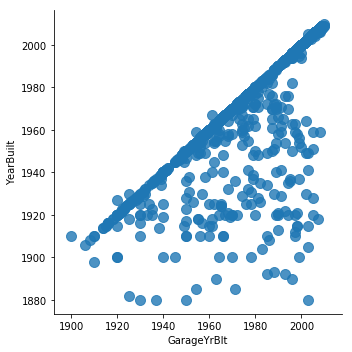

In [359]:
# Examining year built and garage, maybe we should have our GarageYrBlt nans be YearBuilt? 
# Perhaps this is not true though...
sns.lmplot('GarageYrBlt', # Horizontal axis
           'YearBuilt', # Vertical axis
           data=house_train, # Data source
           fit_reg=False, # Don't fix a regression line
           #hue="z", # Set color
           scatter_kws={"marker": "D", # Set marker style
                        "s": 100}) # S marker size

# I think it is fair to say this...it probably just means that there is no garage...
mask = house_test.GarageYrBlt.isnull()
house_test.loc[mask, 'GarageYrBlt'] = house_test.YearBuilt

mask = house_train.GarageYrBlt.isnull()
house_train.loc[mask, 'GarageYrBlt'] = house_train.YearBuilt


Filling in the last remaining NaNs with KNN:
 * Lot Frontage (~300)
 * Electrical (1)
 * 

In [360]:
# from fancyimpute import KNN 

# house_train = KNN(k=20).complete(house_train)
# house_test = KNN(k=20).complete(house_test)

# Filling in the numeric with the median value.
# here we impute the median of a bunch of 1 nans (number of basement bathrooms)
# The larger imputation here for error causing is lot frontage, with around ~300 imputations.
house_train.fillna(house_train.median(),inplace = True)
house_test.fillna(house_test.median(),inplace = True)

# Filling in the categoricals with the median value.
house_train = house_train.apply(lambda x:x.fillna(x.value_counts().index[0]))
house_test = house_test.apply(lambda x:x.fillna(x.value_counts().index[0]))

# Test
for i in range(len(names)):
    s = house_test.iloc[:,i]
    sum1 = s.isnull().sum()
    if sum1 != 0:
        print(names[i])
        print(sum1)

# Train
for i in range(len(names)):
    s = house_train.iloc[:,i]
    sum1 = s.isnull().sum()
    if sum1 != 0:
        print(names[i])
        print(sum1)
        
# Nothing printed means no more NAs! Now we can do other stuff!

### 2.3 Converting ordinal categories into numeric.

Here we will convert the following columns from categorical to numeric:
* GarageQual
* GarageCond
* FireplaceQu
* KitchenQual
* HeatingQC
* BsmtCond
* BsmtQual
* ExterCond
* ExterQual

In [361]:
train_col = house_train.iloc[:, [28]]
set_unique_train = set(pd.unique(train_col.values.ravel()))
print(set_unique_train)
print(names[28])

{'Po', 'Gd', 'Fa', 'TA', 'Ex'}
ExterCond


In [362]:
#########################################
# TRAIN
#########################################

qual_dict = {"No": 0, "Po": 1, "Fa": 2, "TA": 3, "Gd": 4, "Ex": 5,
            0:0, 1:1, 2:2, 3:3, 4:4, 5:5}
house_train["ExterQual"] = house_train["ExterQual"].map(qual_dict).astype(int)
house_train["ExterCond"] = house_train["ExterCond"].map(qual_dict).astype(int)
house_train["BsmtQual"] = house_train["BsmtQual"].map(qual_dict).astype(int)
house_train["BsmtCond"] = house_train["BsmtCond"].map(qual_dict).astype(int)
house_train["HeatingQC"] = house_train["HeatingQC"].map(qual_dict).astype(int)
house_train["KitchenQual"] = house_train["KitchenQual"].map(qual_dict).astype(int)
house_train["FireplaceQu"] = house_train["FireplaceQu"].map(qual_dict).astype(int)
house_train["GarageQual"] = house_train["GarageQual"].map(qual_dict).astype(int)
house_train["GarageCond"] = house_train["GarageCond"].map(qual_dict).astype(int)

#########################################
# TEST
#########################################

qual_dict = {"No": 0, "Po": 1, "Fa": 2, "TA": 3, "Gd": 4, "Ex": 5,
            0:0, 1:1, 2:2, 3:3, 4:4, 5:5}
house_test["ExterQual"] = house_test["ExterQual"].map(qual_dict).astype(int)
house_test["ExterCond"] = house_test["ExterCond"].map(qual_dict).astype(int)
house_test["BsmtQual"] = house_test["BsmtQual"].map(qual_dict).astype(int)
house_test["BsmtCond"] = house_test["BsmtCond"].map(qual_dict).astype(int)
house_test["HeatingQC"] = house_test["HeatingQC"].map(qual_dict).astype(int)
house_test["KitchenQual"] = house_test["KitchenQual"].map(qual_dict).astype(int)
house_test["FireplaceQu"] = house_test["FireplaceQu"].map(qual_dict).astype(int)
house_test["GarageQual"] = house_test["GarageQual"].map(qual_dict).astype(int)
house_test["GarageCond"] = house_test["GarageCond"].map(qual_dict).astype(int)

In [363]:
#########################################
# TRAIN
#########################################

house_train["BsmtExposure"] = house_train["BsmtExposure"].map({None: 0, "No": 1, "Mn": 2, "Av": 3, "Gd": 4,
                                                              0:0, 1:1, 2:2, 3:3, 4:4}).astype(int)

bsmt_fin_dict = {"No": 0, "Unf": 1, "LwQ": 2, "Rec": 3, "BLQ": 4, "ALQ": 5, "GLQ": 6,
                0:0, 1:1, 2:2, 3:3, 4:4, 5:5, 6:6}
house_train["BsmtFinType1"] = house_train["BsmtFinType1"].map(bsmt_fin_dict).astype(int)
house_train["BsmtFinType2"] = house_train["BsmtFinType2"].map(bsmt_fin_dict).astype(int)

house_train["Functional"] = house_train["Functional"].map(
        {"No": 0, "Sal": 1, "Sev": 2, "Maj2": 3, "Maj1": 4, 
         "Mod": 5, "Min2": 6, "Min1": 7, "Typ": 8, 
          0:0, 1:1, 2:2, 3:3, 4:4, 5:5, 6:6, 7:7, 8:8}).astype(int)

house_train["GarageFinish"] = house_train["GarageFinish"].map(
        {"No": 0, "Unf": 1, "RFn": 2, "Fin": 3, 0:0, 1:1, 2:2, 3:3}).astype(int)

house_train["Fence"] = house_train["Fence"].map(
        {"No": 0, "MnWw": 1, "GdWo": 2, "MnPrv": 3, "GdPrv": 4,
         0:0, 1:1, 2:2, 3:3, 4:4}).astype(int)

house_train["CentralAir"] = house_train["CentralAir"].map(
        {"N": 0, "Y": 1,
         0:0, 1:1}).astype(int)

#########################################
# TEST
#########################################

house_test["BsmtExposure"] = house_test["BsmtExposure"].map({None: 0, "No": 1, "Mn": 2, "Av": 3, "Gd": 4,
                                                              0:0, 1:1, 2:2, 3:3, 4:4}).astype(int)

bsmt_fin_dict = {"No": 0, "Unf": 1, "LwQ": 2, "Rec": 3, "BLQ": 4, "ALQ": 5, "GLQ": 6,
                0:0, 1:1, 2:2, 3:3, 4:4, 5:5, 6:6}
house_test["BsmtFinType1"] = house_test["BsmtFinType1"].map(bsmt_fin_dict).astype(int)
house_test["BsmtFinType2"] = house_test["BsmtFinType2"].map(bsmt_fin_dict).astype(int)

house_test["Functional"] = house_test["Functional"].map(
        {"No": 0, "Sal": 1, "Sev": 2, "Maj2": 3, "Maj1": 4, 
         "Mod": 5, "Min2": 6, "Min1": 7, "Typ": 8, 
          0:0, 1:1, 2:2, 3:3, 4:4, 5:5, 6:6, 7:7, 8:8}).astype(int)

house_test["GarageFinish"] = house_test["GarageFinish"].map(
        {"No": 0, "Unf": 1, "RFn": 2, "Fin": 3, 0:0, 1:1, 2:2, 3:3}).astype(int)

house_test["Fence"] = house_test["Fence"].map(
        {"No": 0, "MnWw": 1, "GdWo": 2, "MnPrv": 3, "GdPrv": 4,
         0:0, 1:1, 2:2, 3:3, 4:4}).astype(int)

house_test["CentralAir"] = house_test["CentralAir"].map(
        {"N": 0, "Y": 1,
         0:0, 1:1}).astype(int)

In [364]:
x = house_train.columns.to_series().groupby(house_train.dtypes).groups
# print(x)

### 2.4 Non-ordinal Categorical Variables and Feature Engineering

In [365]:
#########################################
# TRAIN
#########################################

# IR2 and IR3 don't appear that often, so just make a distinction
# between regular and irregular.
house_train["IsRegularLotShape"] = (house_train["LotShape"] == "Reg") * 1

# Most properties are level; bin the other possibilities together
# as "not level".
house_train["IsLandLevel"] = (house_train["LandContour"] == "Lvl") * 1

# Most land slopes are gentle; treat the others as "not gentle".
house_train["IsLandSlopeGentle"] = (house_train["LandSlope"] == "Gtl") * 1

# Most properties use standard circuit breakers.
house_train["IsElectricalSBrkr"] = (house_train["Electrical"] == "SBrkr") * 1

# About 2/3rd have an attached garage.
house_train["IsGarageDetached"] = (house_train["GarageType"] == "Detchd") * 1

# Most have a paved drive. Treat dirt/gravel and partial pavement
# as "not paved".
house_train["IsPavedDrive"] = (house_train["PavedDrive"] == "Y") * 1

# The only interesting "misc. feature" is the presence of a shed.
house_train["HasShed"] = (house_train["MiscFeature"] == "Shed") * 1.  

# If YearRemodAdd != YearBuilt, then a remodeling took place at some point.
house_train["Remodeled"] = (house_train["YearRemodAdd"] != house_train["YearBuilt"]) * 1
    
# Did a remodeling happen in the year the house was sold?
house_train["RecentRemodel"] = (house_train["YearRemodAdd"] == house_train["YrSold"]) * 1
    
# Was this house sold in the year it was built?
house_train["VeryNewHouse"] = (house_train["YearBuilt"] == house_train["YrSold"]) * 1

#########################################
# TEST
#########################################

# IR2 and IR3 don't appear that often, so just make a distinction
# between regular and irregular.
house_test["IsRegularLotShape"] = (house_test["LotShape"] == "Reg") * 1

# Most properties are level; bin the other possibilities together
# as "not level".
house_test["IsLandLevel"] = (house_test["LandContour"] == "Lvl") * 1

# Most land slopes are gentle; treat the others as "not gentle".
house_test["IsLandSlopeGentle"] = (house_test["LandSlope"] == "Gtl") * 1

# Most properties use standard circuit breakers.
house_test["IsElectricalSBrkr"] = (house_test["Electrical"] == "SBrkr") * 1

# About 2/3rd have an attached garage.
house_test["IsGarageDetached"] = (house_test["GarageType"] == "Detchd") * 1

# Most have a paved drive. Treat dirt/gravel and partial pavement
# as "not paved".
house_test["IsPavedDrive"] = (house_test["PavedDrive"] == "Y") * 1

# The only interesting "misc. feature" is the presence of a shed.
house_test["HasShed"] = (house_test["MiscFeature"] == "Shed") * 1.  

# If YearRemodAdd != YearBuilt, then a remodeling took place at some point.
house_test["Remodeled"] = (house_test["YearRemodAdd"] != house_test["YearBuilt"]) * 1
    
# Did a remodeling happen in the year the house was sold?
house_test["RecentRemodel"] = (house_test["YearRemodAdd"] == house_test["YrSold"]) * 1
    
# Was this house sold in the year it was built?
house_test["VeryNewHouse"] = (house_test["YearBuilt"] == house_test["YrSold"]) * 1

More feature engineering, a lot of it coming from:
https://www.kaggle.com/humananalog/xgboost-lasso/code

In [366]:
# More feature engineering...

#########################################
# TRAIN
#########################################

house_train["Has2ndFloor"] = (house_train["2ndFlrSF"] == 0) * 1
house_train["HasMasVnr"] = (house_train["MasVnrArea"] == 0) * 1
house_train["HasWoodDeck"] = (house_train["WoodDeckSF"] == 0) * 1
house_train["HasOpenPorch"] = (house_train["OpenPorchSF"] == 0) * 1
house_train["HasEnclosedPorch"] = (house_train["EnclosedPorch"] == 0) * 1
house_train["Has3SsnPorch"] = (house_train["3SsnPorch"] == 0) * 1
house_train["HasScreenPorch"] = (house_train["ScreenPorch"] == 0) * 1

# Months with the largest number of deals may be significant.
house_train["HighSeason"] = house_train["MoSold"].replace( 
        {1: 0, 2: 0, 3: 0, 4: 1, 5: 1, 6: 1, 7: 1, 8: 0, 9: 0, 10: 0, 11: 0, 12: 0})

house_train["NewerDwelling"] = house_train["MSSubClass"].replace(
        {20: 1, 30: 0, 40: 0, 45: 0,50: 0, 60: 1, 70: 0, 75: 0, 80: 0, 85: 0,
         90: 0, 120: 1, 150: 0, 160: 0, 180: 0, 190: 0})   
    
house_train.loc[house_train.Neighborhood == 'NridgHt', "Neighborhood_Good"] = 1
house_train.loc[house_train.Neighborhood == 'Crawfor', "Neighborhood_Good"] = 1
house_train.loc[house_train.Neighborhood == 'StoneBr', "Neighborhood_Good"] = 1
house_train.loc[house_train.Neighborhood == 'Somerst', "Neighborhood_Good"] = 1
house_train.loc[house_train.Neighborhood == 'NoRidge', "Neighborhood_Good"] = 1
house_train["Neighborhood_Good"].fillna(0, inplace=True)

house_train["SaleCondition_PriceDown"] = house_train.SaleCondition.replace(
        {'Abnorml': 1, 'Alloca': 1, 'AdjLand': 1, 'Family': 1, 'Normal': 0, 'Partial': 0})

# House completed before sale or not
house_train["BoughtOffPlan"] = house_train.SaleCondition.replace(
        {"Abnorml" : 0, "Alloca" : 0, "AdjLand" : 0, "Family" : 0, "Normal" : 0, "Partial" : 1})
    
house_train["BadHeating"] = house_train.HeatingQC.replace(
        {5: 0, 4: 0, 3: 0, 2: 1, 1: 1, 0:0})

area_cols = ['LotFrontage', 'LotArea', 'MasVnrArea', 'BsmtFinSF1', 'BsmtFinSF2', 'BsmtUnfSF',
                 'TotalBsmtSF', '1stFlrSF', '2ndFlrSF', 'GrLivArea', 'GarageArea', 'WoodDeckSF', 
                 'OpenPorchSF', 'EnclosedPorch', '3SsnPorch', 'ScreenPorch', 'LowQualFinSF', 'PoolArea' ]
house_train["TotalArea"] = house_train[area_cols].sum(axis=1)

house_train["TotalArea1st2nd"] = house_train["1stFlrSF"] + house_train["2ndFlrSF"]

house_train["Age"] = 2010 - house_train["YearBuilt"]
house_train["TimeSinceSold"] = 2010 - house_train["YrSold"]

house_train["SeasonSold"] = house_train["MoSold"].map({12:0, 1:0, 2:0, 3:1, 4:1, 5:1, 
                                                  6:2, 7:2, 8:2, 9:3, 10:3, 11:3}).astype(int)
    
house_train["YearsSinceRemodel"] = house_train["YrSold"] - house_train["YearRemodAdd"]

#########################################
# TEST
#########################################

house_test["Has2ndFloor"] = (house_test["2ndFlrSF"] == 0) * 1
house_test["HasMasVnr"] = (house_test["MasVnrArea"] == 0) * 1
house_test["HasWoodDeck"] = (house_test["WoodDeckSF"] == 0) * 1
house_test["HasOpenPorch"] = (house_test["OpenPorchSF"] == 0) * 1
house_test["HasEnclosedPorch"] = (house_test["EnclosedPorch"] == 0) * 1
house_test["Has3SsnPorch"] = (house_test["3SsnPorch"] == 0) * 1
house_test["HasScreenPorch"] = (house_test["ScreenPorch"] == 0) * 1

# Months with the largest number of deals may be significant.
house_test["HighSeason"] = house_test["MoSold"].replace( 
        {1: 0, 2: 0, 3: 0, 4: 1, 5: 1, 6: 1, 7: 1, 8: 0, 9: 0, 10: 0, 11: 0, 12: 0})

house_test["NewerDwelling"] = house_test["MSSubClass"].replace(
        {20: 1, 30: 0, 40: 0, 45: 0,50: 0, 60: 1, 70: 0, 75: 0, 80: 0, 85: 0,
         90: 0, 120: 1, 150: 0, 160: 0, 180: 0, 190: 0})   
    
house_test.loc[house_test.Neighborhood == 'NridgHt', "Neighborhood_Good"] = 1
house_test.loc[house_test.Neighborhood == 'Crawfor', "Neighborhood_Good"] = 1
house_test.loc[house_test.Neighborhood == 'StoneBr', "Neighborhood_Good"] = 1
house_test.loc[house_test.Neighborhood == 'Somerst', "Neighborhood_Good"] = 1
house_test.loc[house_test.Neighborhood == 'NoRidge', "Neighborhood_Good"] = 1
house_test["Neighborhood_Good"].fillna(0, inplace=True)

house_test["SaleCondition_PriceDown"] = house_test.SaleCondition.replace(
        {'Abnorml': 1, 'Alloca': 1, 'AdjLand': 1, 'Family': 1, 'Normal': 0, 'Partial': 0})

# House completed before sale or not
house_test["BoughtOffPlan"] = house_test.SaleCondition.replace(
        {"Abnorml" : 0, "Alloca" : 0, "AdjLand" : 0, "Family" : 0, "Normal" : 0, "Partial" : 1})
    
house_test["BadHeating"] = house_test.HeatingQC.replace(
        {5: 0, 4: 0, 3: 0, 2: 1, 1: 1, 0:0})

area_cols = ['LotFrontage', 'LotArea', 'MasVnrArea', 'BsmtFinSF1', 'BsmtFinSF2', 'BsmtUnfSF',
                 'TotalBsmtSF', '1stFlrSF', '2ndFlrSF', 'GrLivArea', 'GarageArea', 'WoodDeckSF', 
                 'OpenPorchSF', 'EnclosedPorch', '3SsnPorch', 'ScreenPorch', 'LowQualFinSF', 'PoolArea' ]
house_test["TotalArea"] = house_test[area_cols].sum(axis=1)

house_test["TotalArea1st2nd"] = house_test["1stFlrSF"] + house_test["2ndFlrSF"]

house_test["Age"] = 2010 - house_test["YearBuilt"]
house_test["TimeSinceSold"] = 2010 - house_test["YrSold"]

house_test["SeasonSold"] = house_test["MoSold"].map({12:0, 1:0, 2:0, 3:1, 4:1, 5:1, 
                                                  6:2, 7:2, 8:2, 9:3, 10:3, 11:3}).astype(int)
    
house_test["YearsSinceRemodel"] = house_test["YrSold"] - house_test["YearRemodAdd"]

Now we add in some neighborhood information:

In [367]:

    
# Bin by neighborhood (a little arbitrarily). Values were computed by: 
# train_df["SalePrice"].groupby(train_df["Neighborhood"]).median().sort_values()
neighborhood_map = {
        "MeadowV" : 0,  #  88000
        "IDOTRR" : 1,   # 103000
        "BrDale" : 1,   # 106000
        "OldTown" : 1,  # 119000
        "Edwards" : 1,  # 119500
        "BrkSide" : 1,  # 124300
        "Sawyer" : 1,   # 135000
        "Blueste" : 1,  # 137500
        "SWISU" : 2,    # 139500
        "Names" : 2,    # 140000
        "NPkVill" : 2,  # 146000
        "Mitchel" : 2,  # 153500
        "SawyerW" : 2,  # 179900
        "Gilbert" : 2,  # 181000
        "NWAmes" : 2,   # 182900
        "Blmngtn" : 2,  # 191000
        "CollgCr" : 2,  # 197200
        "ClearCr" : 3,  # 200250
        "Crawfor" : 3,  # 200624
        "Veenker" : 3,  # 218000
        "Somerst" : 3,  # 225500
        "Timber" : 3,   # 228475
        "StoneBr" : 4,  # 278000
        "NoRidge" : 4,  # 290000
        "NridgHt" : 4,  # 315000
}

house_train["NeighborhoodBin"] = house_train["Neighborhood"].map(neighborhood_map)
house_test["NeighborhoodBin"] = house_test["Neighborhood"].map(neighborhood_map)

Let's see if the USA market housing fluxuations affected this small town. We can put all the points on a plot...

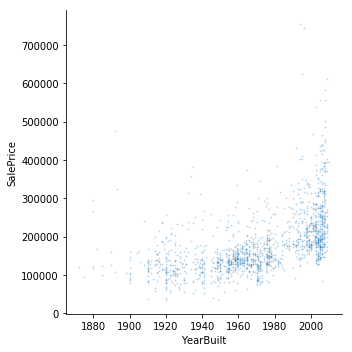

In [368]:
sns.lmplot('YearBuilt', # Horizontal axis
           'SalePrice', # Vertical axis
           data=house_train, # Data source
           fit_reg=False, # Don't fix a regression line
           scatter_kws={"marker": "D", # Set marker style
                        "alpha": .2,
                        "s": 1}) # S marker size

# There is a definite trend here in price, but this might be learned from the year columns...

In [369]:
# house_train.columns.to_series().groupby(house_train.dtypes).groups

Now we have done some good feature engineering. For the rest of the categorical features that are left, we can either omit them or use them as one hot features (get_dummies). We'll see what's best in the future.

### 2.5 Removing Outliers

In order to refine our algorithm we are going to want to remove outliers, points that are too far beyond the realm of likelihood...

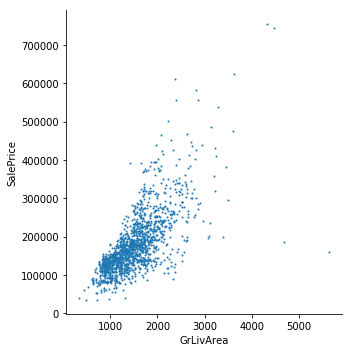

In [370]:
sns.lmplot('GrLivArea', # Horizontal axis
           'SalePrice', # Vertical axis
           data=house_train, # Data source
           fit_reg=False, # Don't fix a regression line
           scatter_kws={"marker": "D", # Set marker style
                        "alpha": 1,
                        "s": 1}) # S marker size

In [406]:
# Based on the author's paper, we will remove some of the outliers:
house_train = house_train.drop(house_train[(house_train.GrLivArea > 4000) & (house_train['SalePrice']<300000)].index)

## 3.0 Exploration, Unsupervised Learning

Now we want to look for some more structure in the data. Are there discernible groups? What features are the primary drivers of SalePrice?

First we will make some dummies for the categorical features so we can do PCA. 

In [450]:
##MJG UPDATED HERE
#looking at Shu's class code to see what should be dropped for zero variance or near zero variance
full_df = pd.concat(( house_train, house_test ))

drop_cols = ['Street', 'Utilities', "Condition2", "RoofMatl", "PoolQC", 
             "MiscVal", "LandSlope", "LowQualFinSF", "PoolArea", "3SsnPorch", "Has3SsnPorch"]
full_df =full_df.drop(drop_cols,axis=1)
full_df.shape

(2917, 100)

In [465]:
#full_df = pd.concat(( house_train, house_test ))
full_df_dummies  = pd.get_dummies(full_df)

house_train_d = full_df_dummies[0:1456]
house_test_d = full_df_dummies[1456:2915]

# Fixing some column names:
house_train_d.rename(index=str, columns={"Exterior1st_Wd Sdng": "Exterior1st_Wd_Sdng", 
                              "HouseStyle_1.5Fin": "HouseStyle_1_5Fin",
                             "HouseStyle_1.5Unf": "HouseStyle_1_5Unf",
                             "HouseStyle_2.5Fin": "HouseStyle_2_5Fin",
                             "HouseStyle_2.5Unf": "HouseStyle_2_5Unf",
                             "Exterior2nd_Brk Cmn": "Exterior2nd_Brk_Cmn",
                             "Exterior2nd_Wd Sdng":"Exterior2nd_Wd_Sdng",
                             "RoofMatl_Tar&Grv":"RoofMatl_Tar_Grv"}, inplace = True)
house_test_d.rename(index=str, columns={"Exterior1st_Wd Sdng": "Exterior1st_Wd_Sdng", 
                              "HouseStyle_1.5Fin": "HouseStyle_1_5Fin",
                             "HouseStyle_1.5Unf": "HouseStyle_1_5Unf",
                             "HouseStyle_2.5Fin": "HouseStyle_2_5Fin",
                             "HouseStyle_2.5Unf": "HouseStyle_2_5Unf",
                              "Exterior2nd_Brk Cmn": "Exterior2nd_Brk_Cmn",
                              "Exterior2nd_Wd Sdng":"Exterior2nd_Wd_Sdng",
                              "RoofMatl_Tar&Grv":"RoofMatl_Tar_Grv"}, inplace = True)
house_train_d.drop(["MSZoning_C (all)","Exterior2nd_Wd Shng"], axis=1, inplace = True)
house_test_d.drop(["MSZoning_C (all)","Exterior2nd_Wd Shng"], axis=1, inplace = True)

In [467]:
house_test_d.drop(['SalePrice'], axis=1, inplace = True)

# Putting SalePrice last, check that the columns are in same order...
# names = list(house_train_d.columns.values)
# cols = house_train_d.columns.tolist()
# cols = cols[0:70] + cols[71:269] + [cols[70]]
# house_train_d = house_train_d[cols] 
temp = house_train_d["SalePrice"]
del house_train_d["SalePrice"]
house_train_d["SalePrice"] = temp

# Sanity Check
print(house_train.shape)
print(house_test.shape)
print(house_train_d.shape)
print(house_test_d.shape)

#house_train_d

(1458, 111)
(1459, 110)
(1456, 235)
(1459, 234)


In [430]:
pca = PCA(n_components=5)
pca.fit(house_train_d)
pca.components_ 

array([[ 2.95676560e-03,  1.74760591e-03, -1.97812009e-04, ...,
        -1.98599483e-08, -1.02959203e-06,  4.70437151e-03],
       [ 3.27661318e-03, -1.40329631e-03,  3.34298239e-04, ...,
         1.37425343e-08,  2.15208029e-06,  1.87331687e-03],
       [ 1.71303791e-01,  1.48891219e-01,  5.52301461e-03, ...,
        -4.35124463e-07,  1.53496799e-05,  3.20195010e-01],
       [ 3.18536131e-01, -6.19215765e-01, -8.19150356e-03, ...,
         2.26120320e-06, -4.77755053e-05, -3.00679634e-01],
       [-1.13951408e-02, -1.21775012e-01, -5.18148627e-03, ...,
        -2.98895236e-07, -1.23233854e-04, -1.33170152e-01]])

In [468]:
X = house_train_d.ix[:,0:234].values
y = house_train_d.ix[:,234].values

X_std = StandardScaler().fit_transform(X)

In [381]:
cov_mat = np.cov(X_std.T)

eig_vals, eig_vecs = np.linalg.eig(cov_mat)

import plotly.plotly as py
from plotly.graph_objs import *
import plotly.tools as tls
from plotly.offline import plot

tot = sum(eig_vals.real)
var_exp = [(i / tot)*100 for i in sorted(eig_vals.real, reverse=True)]
cum_var_exp = np.cumsum(var_exp)

trace1 = Bar(
        x=['PC %s' %i for i in range(1,268)],
        y=var_exp,
        showlegend=False)

trace2 = Scatter(
        x=['PC %s' %i for i in range(1,268)], 
        y=cum_var_exp,
        name='cumulative explained variance')

data = Data([trace1, trace2])

layout=Layout(
        yaxis=YAxis(title='Explained variance in percent'),
        title='Explained variance by different principal components')

fig = Figure(data=data, layout=layout)

# We see from this plot that the we could possibly reduce our features if we had the inclination...
# I do not have the inclination at this time.
plot(fig)

'file:///Users/adodd202/Documents/Bootcamp_Spring2018/HousingPricesML/temp-plot.html'

## 4. Modeling and Prediction

Here we add some potential models...

Reference: 
https://www.kaggle.com/serigne/stacked-regressions-top-4-on-leaderboard
https://www.kaggle.com/humananalog/xgboost-lasso/code

### 4.1 Set up for models

In [469]:
from sklearn.linear_model import ElasticNet, Lasso,  BayesianRidge, LassoLarsIC
from sklearn.metrics import mean_squared_error
from sklearn.ensemble import RandomForestRegressor
from sklearn.kernel_ridge import KernelRidge
import xgboost as xgb
#import lightgbm as lgb
import tensorflow as tf
import warnings
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import KFold, cross_val_score, train_test_split
from sklearn.metrics import mean_squared_error
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import RobustScaler

Below is an error function that will return either rmse or rmsle. Both are sometimes useful.

In [470]:
def get_error(y_true, y_pred, type = "rmsle"):
    assert len(y_true) == len(y_pred), "Length of prediction and test do not match!"
    
    list_types = ["rmsle","rmse"]
    assert type in list_types, "Error type you requested is not an option. Choose 'rmse' or 'rmsle' please."
        
    # Root mean square error (RMSE)
    if type == "rmse":
        return np.square(y_pred - y_true).mean() ** 0.5
    
    # Root mean square log error (RMSLE)
    if type == "rmsle":
        return np.square(np.log(y_pred) - np.log(y_true)).mean() ** 0.5

### 4.2 Model Definitions (5 models)

In [471]:
# Lasso
def lasso(X_train, X_test, y_train, y_test):
    regr = make_pipeline(RobustScaler(), Lasso(alpha =0.85, random_state=1))
    regr.fit(X_train, y_train)
    y_pred = regr.predict(X_test)
    return y_pred
    
# Elastic
def elastic(X_train, X_test, y_train, y_test):
    regr = ElasticNet(alpha=0.0005, l1_ratio=.9, random_state=3)
    regr.fit(X_train, y_train)
    y_pred = regr.predict(X_test)
    return y_pred
    
# Random forest
def rf(X_train, X_test, y_train, y_test):
    regr = RandomForestRegressor(n_estimators=40, max_depth=10, random_state=0)
    regr.fit(X_train, y_train)
    y_pred = regr.predict(X_test)
    return y_pred

# Kernel ridge regression
def krr(X_train, X_test, y_train, y_test):
    KRR = KernelRidge(alpha=0.6, kernel='polynomial', degree=2, coef0=2.5)
    KRR.fit(X_train,y_train)
    y_pred = KRR.predict(X_test)
    return y_pred

# Light GBM
# def lgb(X_train, X_test, y_train, y_test):
#     lgb = LGBMRegressor(objective='regression',num_leaves=5,
#                               learning_rate=0.05, n_estimators=720,
#                               max_bin = 55, bagging_fraction = 0.8,
#                               bagging_freq = 5, feature_fraction = 0.2319,
#                               feature_fraction_seed=9, bagging_seed=9,
#                               min_data_in_leaf =6, min_sum_hessian_in_leaf = 11)
#     lgb.fit(X_train, y_train)
#     y_pred = lgb.predict(X_test)
#     return y_pred

# XGBoost
def xgboost(X_train, X_test, y_train, y_test):
    xgboost = xgb.XGBRegressor(
                 colsample_bytree=0.1,
                 gamma=10.0,
                 learning_rate=0.01,
                 max_depth=5,
                 min_child_weight=20,
                 n_estimators=7200,                                                                  
                 reg_alpha=0.5,
                 reg_lambda=0.6,
                 subsample=0.5,
                 seed=42,
                 silent=1)
    xgboost.fit(X_train,y_train)
    y_pred = xgboost.predict(X_test)
    return y_pred

### 4.3 Model Definitions (Neural Network)

In [472]:
# Helper function for parsing data set and getting feature columns and labels.
def input_fn(data_set, pred = False):
    
    if pred == False:
        
        feature_cols = {k: tf.constant(data_set[k].values) for k in FEATURES}
        labels = tf.constant(data_set[LABEL].values)
        
        return feature_cols, labels

    if pred == True:
        feature_cols = {k: tf.constant(data_set[k].values) for k in FEATURES}
        
        return feature_cols

In [473]:
# This is a deep neural network with a single scalar output price, with layers:
# 200, 100, 50, 25, 12. Other structures were tried such as 200, 12 also 
# 200, 100, 50, 25, 12, 6, 3. These other structures proved to have no improvement (slightly worse).
# Different numbers of solver steps were tested (1000, 2000, 4000, 6000, 10000). 
# 4000 proved slightly optimal.

# Reference:
# https://www.kaggle.com/zoupet/neural-network-model-for-house-prices-tensorflow

def neural(X_train, X_test, y_train, y_test):
    ################################################################
    ###################### Preprocess for NN #######################
    ################################################################
    
    y_train_df = pd.DataFrame(y_train, columns = [LABEL])

    training_set = pd.DataFrame(X_train, columns = FEATURES).merge(y_train_df, left_index = True, right_index = True)

    # Same thing but for the test set
    y_test = pd.DataFrame(y_test, columns = [LABEL])
    testing_set = pd.DataFrame(X_test, columns = FEATURES).merge(y_test, left_index = True, right_index = True)
    testing_set.head()

    # Reset the index of training
    training_set.reset_index(drop = True, inplace =True)
    
    ################################################################
    ######### Beginning our TF session and making model... #########
    ################################################################
    tf.Session()

    # Model
    tf.logging.set_verbosity(tf.logging.ERROR)
    regressor = tf.contrib.learn.DNNRegressor(feature_columns=feature_cols, 
                                          activation_fn = tf.nn.relu, 
                                          hidden_units=[200,100,50,25,12])#, #100 removed                              
                                          #optimizer = tf.train.GradientDescentOptimizer( learning_rate= 0.1 ))
                                          #optimizer = tf.train.AdamOptimizer(learning_rate=.1))
        
    training_set.reset_index(drop = True, inplace =True)

    # Deep Neural Network Regressor with the training set which contain the data split by train test split
    regressor.fit(input_fn=lambda: input_fn(training_set), steps=4000)
    
    ev = regressor.evaluate(input_fn=lambda: input_fn(testing_set), steps=1)
    loss_score1 = ev["loss"]
    
    # Making predictions as a numpy array
    y_pred = np.array(list(regressor.predict(input_fn=lambda: input_fn(testing_set))))
    
    return y_pred

### 4.4 Preprocessing/Scaling, Train/Test Split

Below we begin with some scaling...

In [476]:
warnings.filterwarnings('ignore')

train = house_train_d.ix[:,0:234]
#print(house_train_d.head)
test = house_test_d

col_train = list(train.columns)
col_train_bis = list(train.columns)

mat_train = np.matrix(train) # matrix from train (1456 rows)
mat_test  = np.matrix(test)  # matrix from test( ~1456 rows)

# Scaling mat_test
prepro_test = MinMaxScaler()
prepro_test.fit(mat_test)

# Scaling mat_train
prepro = MinMaxScaler()
mat_train_part = mat_train[:,0:234]
prepro.fit(mat_train_part)

train = pd.DataFrame(prepro.transform(mat_train_part),columns = col_train)

# Adding SalePrice to a scaled Train
train.assign(SalePrice = house_train['SalePrice'], inplace = True)
train['SalePrice'] = list(house_train_d['SalePrice'])
# This is the preprocessed/scaled dataset for submission
test  = pd.DataFrame(prepro_test.transform(mat_test),columns = col_train_bis)

print(train.shape)
print(test.shape)

(1456, 235)
(1459, 234)


Here we are doing some more set up for train-test split.

In [477]:
# List of features
COLUMNS = col_train
FEATURES = col_train_bis
LABEL = "SalePrice"

# Columns for tensorflow
feature_cols = [tf.contrib.layers.real_valued_column(k) for k in FEATURES]

# Training set and Prediction set with the features to predict
training_set = train[COLUMNS]
training_set = training_set[FEATURES]
X = np.array(training_set)
prediction_set = train.SalePrice
y = np.array(prediction_set)

print(X.shape)
print(y.shape)
print(house_train_d.shape)
print(house_test_d.shape)

#print(X[0])
print(y[0])

(1456, 234)
(1456,)
(1456, 235)
(1459, 234)
208500.0


### 4.5 Stacking Pipeline

In [478]:
def XGB_stack(y_pred, y_test, param):
    ######## Inputs: y_pred, y_test #######
    # y_pred: the original ~1450 training set predictions from all the base models
    # y_pred.shape: 1450 x 6
    # y_test: the true housing prices for all of the training set
    # y_test.shape: 1450 x 6
    #######################################
    
    # This didnt really work...
#     X_train_stack, X_test_stack, y_train_stack, y_test_stack = train_test_split(y_pred, y_test, 
#                                                       test_size=0.2, random_state=42)


#     regr = Lasso(alpha=.0005, max_iter=50000, tol = .0001)
    
#     regr.fit(X_train_stack,y_train_stack)
#     y_pred_stack = regr.predict(X_test_stack)
    
#     print("This is the real deal:")
#     print("Predicted error of XGBoost stacker is {}".format(get_error(y_test_stack, y_pred_stack)))
    
#     # This is the trained XGBoost predictions on the entire set of base model predictions.
#     # It is very important to note that 80% of the following vector has been trained on, 
#     # so accuracy may not be true.
#     y_pred_stack_all = regr.predict(y_pred)

#     y_pred_stack_all = np.mean(y_pred, axis = 1)
    return y_pred_stack_all

In [479]:
# I tried stratified K-fold but I didn't like the unequal splitting of number of observations.
from sklearn.model_selection import StratifiedKFold 
from sklearn.model_selection import KFold 

# Setting up parameters for k-folds
n_folds = 5
#skf = StratifiedKFold(n_splits=n_folds)
skf = KFold(n_splits=n_folds)

i = 1
log_error_sum = 0

y_pred_all = np.zeros((len(y),5))

# Stratified K-folds for all models, stacking at end and averaging log errors across all folds
for train_index, test_index in skf.split(X, y):
    X_train, X_test = X[train_index], X[test_index]
    y_train, y_test = y[train_index], y[test_index]
    
    print("-" * 70)
    print ("Running training fold {} out of {} total splits".format(i, n_folds))
    print("Shape of training set is: {}, and Shape of testing set is: {}".format(X_train.shape,X_test.shape))
    
    y_pred_rf = rf(X_train, X_test, y_train, y_test)
    y_pred_elastic = elastic(X_train, X_test, y_train, y_test)
    
    print("Ran rf and elastic")
    y_pred_lasso = lasso(X_train, X_test, y_train, y_test)
    y_pred_xgb = xgboost(X_train, X_test, y_train, y_test)
    y_pred_krr = krr(X_train, X_test, y_train, y_test)
    # y_pred_lgb = lgb(X_train, X_test, y_train, y_test)

    print("Ran lasso, xgb, and krr, starting neural")
    #y_pred_neural = neural(X_train, X_test, y_train, y_test)
    
    # Some of the values come out negative so we'll fix thouse...
    estimate = 125000
    mask = y_pred_rf<0
    y_pred_rf[mask] = estimate
    mask = y_pred_elastic<0
    y_pred_elastic[mask] = estimate
    mask = y_pred_lasso<0
    y_pred_lasso[mask] = estimate
    mask = y_pred_xgb<0
    y_pred_xgb[mask] = estimate
    mask = y_pred_krr<0
    y_pred_krr[mask] = estimate
    # mask = y_pred_lgb<0
    # y_pred_lgb[mask] = estimate
    #mask = y_pred_neural<0
    #y_pred_neural[mask] = estimate
    
    y_pred = np.column_stack((y_pred_lasso, y_pred_rf, y_pred_krr, # y_pred_lgb,
                              y_pred_xgb, y_pred_elastic))#, y_pred_neural))
    
    y_pred_mean_stack = np.mean(y_pred, axis = 1)
    
    log_error_part = get_error(y_test, y_pred_mean_stack)
    print("log error on this fold is {}".format(log_error_part))
    print("rf log error on this fold is {}".format(get_error(y_test, y_pred_rf)))
    print("elastic log error on this fold is {}".format(get_error(y_test, y_pred_elastic)))
    print("lasso log error on this fold is {}".format(get_error(y_test, y_pred_lasso)))
    print("xgb log error on this fold is {}".format(get_error(y_test, y_pred_xgb)))
    print("krr log error on this fold is {}".format(get_error(y_test, y_pred_krr)))
    
    log_error_sum = log_error_sum + log_error_part
    
    # Adding the new predictions onto the total predictions we will later use for stacking:
    y_pred_all[test_index] = y_pred 
    print()
    
    i += 1
    
log_error_avg = log_error_sum/n_folds
print(log_error_avg)

----------------------------------------------------------------------
Running training fold 1 out of 5 total splits
Shape of training set is: (1164, 234), and Shape of testing set is: (292, 234)
Ran rf and elastic
Ran lasso, xgb, and krr, starting neural
log error on this fold is 0.11431251654215105
rf log error on this fold is 0.13306015534091908
elastic log error on this fold is 0.15529748600365242
lasso log error on this fold is 0.1550491984153707
xgb log error on this fold is 0.11216830424841985
krr log error on this fold is 0.13678008427146032

----------------------------------------------------------------------
Running training fold 2 out of 5 total splits
Shape of training set is: (1165, 234), and Shape of testing set is: (291, 234)
Ran rf and elastic
Ran lasso, xgb, and krr, starting neural
log error on this fold is 0.12364370421544808
rf log error on this fold is 0.14267672197934964
elastic log error on this fold is 0.20645953222290112
lasso log error on this fold is 0.2064

In [480]:
# Implementing more in depth stacking now...

l1 = [0,1,2,3,4,5]
for i in range(len(l1)):
    y_pred_all_stacked = XGB_stack(y_pred_all, y, param = l1[i])

    print("final error where we 80% of our test set is our training set:{}".format(get_error(y, y_pred_all_stacked)))

NameError: name 'y_pred_stack_all' is not defined

### 4.6 Parameter Optimization
Bayesian optimization:

In [347]:
from bayes_opt import BayesianOptimization
from tqdm import tqdm
import xgboost as xgb

def prepare_data():
    train = pd.read_csv('./Data/train_dummies.csv')
    categorical_columns = train.select_dtypes(include=['object']).columns

    for column in tqdm(categorical_columns):
        le = LabelEncoder()
        train[column] = le.fit_transform(train[column])

    y = train['SalePrice']

    X = train.drop(['SalePrice'], 1)
    xgtrain = xgb.DMatrix(X, label=y)

    return xgtrain

def xgb_evaluate(min_child_weight,
                 colsample_bytree,
                 max_depth,
                 subsample,
                 gamma,
                 alpha):

    params['min_child_weight'] = int(min_child_weight)
    params['cosample_bytree'] = max(min(colsample_bytree, 1), 0)
    params['max_depth'] = int(max_depth)
    params['subsample'] = max(min(subsample, 1), 0)
    params['gamma'] = max(gamma, 0)
    params['alpha'] = max(alpha, 0)


    cv_result = xgb.cv(params, xgtrain, num_boost_round=num_rounds, nfold=5,
             seed=random_state,
             callbacks=[xgb.callback.early_stop(50)])

    return -cv_result['test-mae-mean'].values[-1]


xgtrain = prepare_data()

num_rounds = 3000
random_state = 2016
num_iter = 25
init_points = 5
params = {
    'eta': 0.1,
    'silent': 1,
    'eval_metric': 'mae',
    'verbose_eval': True,
    'seed': random_state
}

xgbBO = BayesianOptimization(xgb_evaluate, {'min_child_weight': (1, 20),
                                            'colsample_bytree': (0.1, 1),
                                            'max_depth': (5, 15),
                                            'subsample': (0.5, 1),
                                            'gamma': (0, 10),
                                            'alpha': (0, 10),
                                            })

xgbBO.maximize(init_points=init_points, n_iter=num_iter)

0it [00:00, ?it/s]


Initialization
---------------------------------------------------------------------------------------------------------------------------
 Step |   Time |      Value |     alpha |   colsample_bytree |     gamma |   max_depth |   min_child_weight |   subsample | 
Multiple eval metrics have been passed: 'test-mae' will be used for early stopping.

Will train until test-mae hasn't improved in 50 rounds.
Stopping. Best iteration:
[110]	train-mae:1729.66+108.615	test-mae:14806.4+1118.66

    1 | 00m23s | -14806.41504 |    1.4912 |             0.9531 |    8.9513 |      8.6435 |             1.3357 |      0.7223 | 
Multiple eval metrics have been passed: 'test-mae' will be used for early stopping.

Will train until test-mae hasn't improved in 50 rounds.
Stopping. Best iteration:
[179]	train-mae:1186.66+77.5839	test-mae:14769.9+816.813

    2 | 00m42s | -14769.87344 |    3.7854 |             0.7715 |    3.9877 |     12.5375 |             8.8577 |      0.7892 | 
Multiple eval metrics have been 

Will train until test-mae hasn't improved in 50 rounds.
Stopping. Best iteration:
[170]	train-mae:311.684+17.5489	test-mae:14895.8+898.844

   21 | 00m45s | -14895.84609 |    0.0000 |             1.0000 |   10.0000 |     15.0000 |             1.0000 |      0.5000 | 
Multiple eval metrics have been passed: 'test-mae' will be used for early stopping.

Will train until test-mae hasn't improved in 50 rounds.
Stopping. Best iteration:
[118]	train-mae:6639.9+181.983	test-mae:14320.9+726.937

   22 | 00m27s | -14320.89590 |    0.0000 |             0.1000 |    0.0000 |     15.0000 |            20.0000 |      0.5000 | 
Multiple eval metrics have been passed: 'test-mae' will be used for early stopping.

Will train until test-mae hasn't improved in 50 rounds.
Stopping. Best iteration:
[185]	train-mae:8051.18+295.96	test-mae:14130+750.68

   23 | 00m21s | -14130.02285 |   10.0000 |             0.1000 |    0.0000 |      5.0000 |            20.0000 |      0.5000 | 
Multiple eval metrics have been pa

In [348]:
print(xgbBO.res['max'])


{'max_val': -14129.9503908, 'max_params': {'min_child_weight': 20.0, 'colsample_bytree': 0.1, 'max_depth': 5.0, 'subsample': 0.5, 'gamma': 10.0, 'alpha': 0.0}}


### 4.7 Creating Predictions

In [ ]:
# Creating a scatter plot of the above results:
ax = sns.regplot(x=y_pred, y=y_test,
                 scatter_kws={"marker": "D", # Set marker style
                        "alpha": .5,
                        "s": 3})

### 4.8 Old thoughts elephant boneyard

In [ ]:


# Predictions
# y_test = np.array(testing_set['SalePrice'])

# Training for submission
training_sub = training_set[col_train]

# Train and Test 
# x_train, x_test, y_train, y_test = train_test_split(training_set[FEATURES] , prediction_set, 
#                                                     test_size=0.2, random_state=42)

## 5. Write to CSV (results, data, etc)

In [ ]:
# Here we are writing our cleaned dataframe to a CSV...

In [ ]:
house_train_d.to_csv("train_dummies.csv")
house_test_d.to_csv("test_dummies.csv")